# Evaluate different models for datasets

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2)

# 1 single dataset

/tmp/ipykernel_3629807/939161022.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(input[input["model"] == "RandomForest"].mean())


fit_time              3.417154
score_time            0.061655
test_acc              0.810662
test_b_acc            0.586722
test_recall           0.940110
test_precision        0.845527
test_roc_auc_micro    0.723443
test_roc_auc_macro    0.723443
test_f1               0.889050
test_f1_micro         0.810662
test_f1_macro         0.592858
test_f1_weighted      0.780468
test_fbeta            0.918651
dtype: float64


Text(0.5, 1.0, '12_sterol_discoveryValidation')

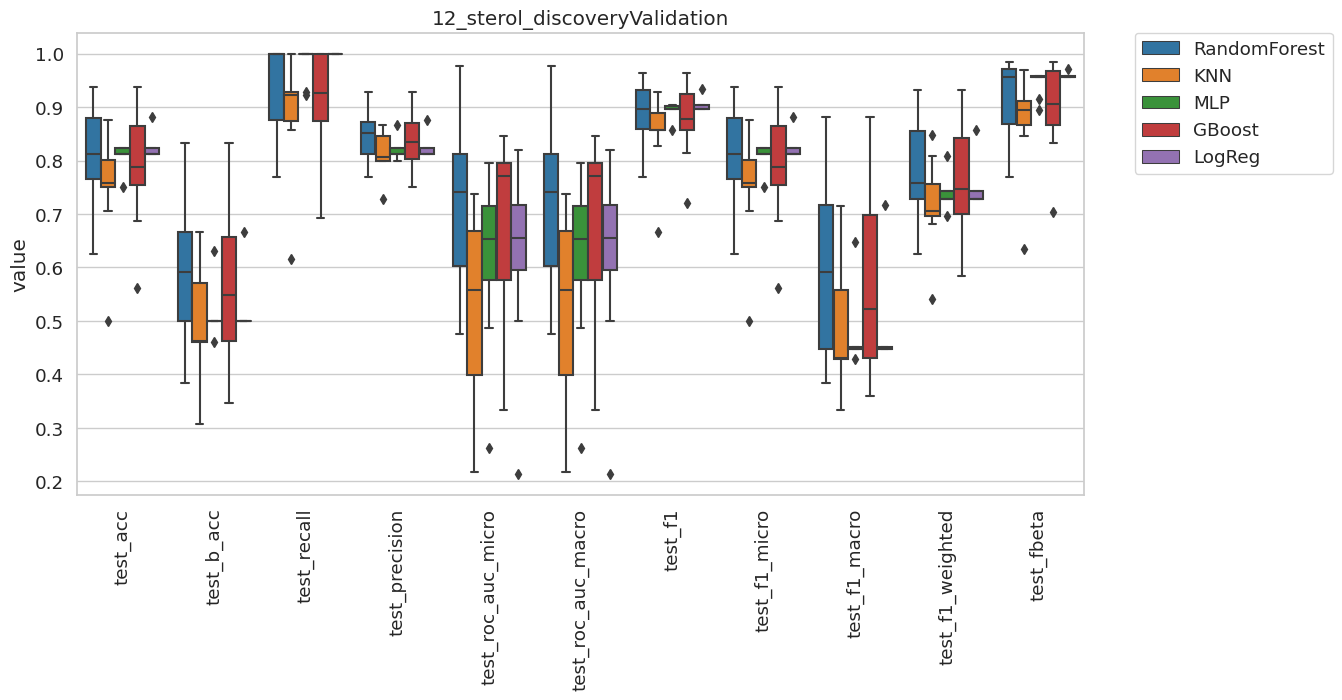

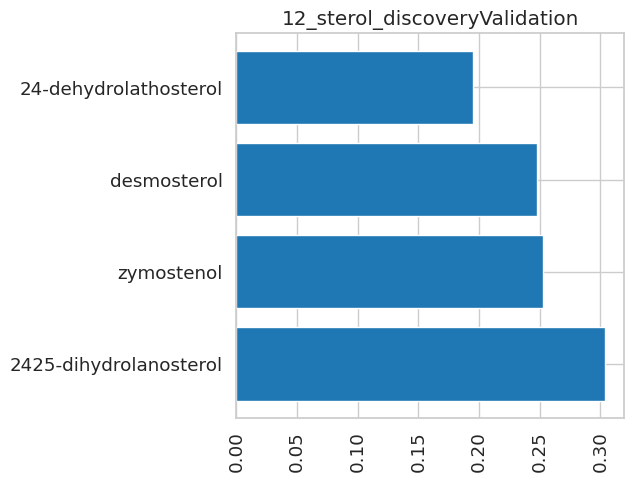

In [2]:
'''
Define paths
'''
dataset = "12_sterol_discoveryValidation"
varPath = f"../../results/featureSelection/{dataset}/boruta.txt"
resultsPath = f"../../results/prediction/featureSelection/{dataset}/boruta/modelComparison"

''' 
Read in scores
'''
input = pd.DataFrame()
for file in os.listdir(resultsPath):
    if file.endswith("score.csv"):
        input = pd.concat([input,pd.read_csv(f"{resultsPath}/{file}")], axis=0, ignore_index=True)

''' 
Plot
'''
df_plot = input.drop(["fit_time", "score_time"], axis=1)
print(input[input["model"] == "RandomForest"].mean())
df_plot = df_plot.melt("model")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="model")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"{dataset}")

''' 
Additional plot: feature importance
'''
df = pd.read_csv(f"{resultsPath}/RandomForest_featureImportance.csv")
fig, ax = plt.subplots(figsize=(5,5))
plt.barh(df["var"], df["fi"])
ax.tick_params(axis='x', rotation=90)
plt.title(f"{dataset}")

# Compare different datasets

In [3]:
model = "RandomForest"

Text(0.5, 1.0, 'Different sterol subsets')

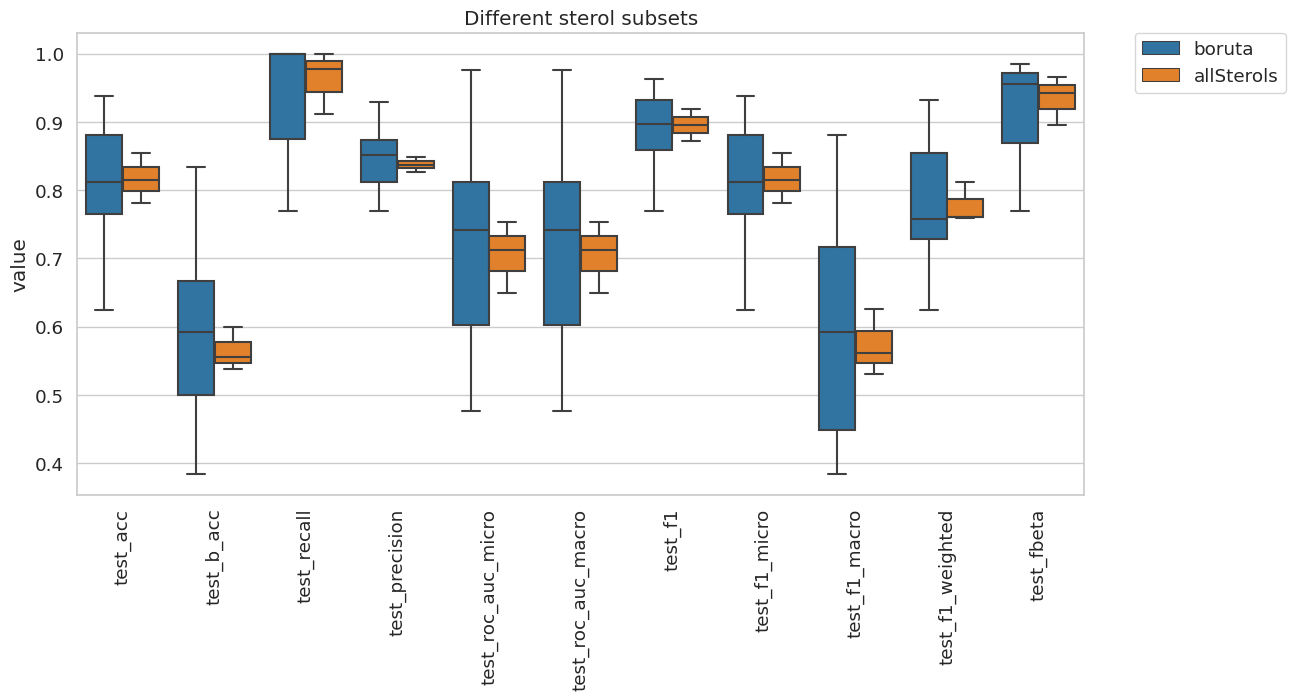

In [4]:
'''
Define paths
'''

dataset = "12_sterol_discoveryValidation"
input = pd.DataFrame()
for vars in ["boruta", "allSterols"]:
    varPath = f"../../results/featureSelection/{dataset}/{vars}.txt"
    resultsPath = f"../../results/prediction/featureSelection/{dataset}/{vars}/modelComparison"

    ''' 
    Read in scores
    '''
    for file in os.listdir(resultsPath):
        if file.endswith("score.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["selVars"] = vars
            input = pd.concat([input,tmp], axis=0, ignore_index=True)


''' 
Plot
'''
df_plot = input[input["model"] == model]
df_plot = df_plot.drop(["fit_time", "score_time", "model"], axis=1)
df_plot = df_plot.melt("selVars")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="selVars")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Different sterol subsets")